#LABORATORIO 5

INTEGRANTES:
* JUAN CRUZ
* SEBASTIÁN RODRIGUEZ
* ALEJANDRO BARBOSA

#[MEN_MATRICULA_EN_EDUCACION_EN_PREESCOLAR, BÁSICA Y MEDIA_2018_2022](https://www.datos.gov.co/Educaci-n/MEN_MATRICULA_EN_EDUCACION_EN_PREESCOLAR-B-SICA-Y-/sty3-c395/about_data)

##*Ficha técnica*
---


Contiene la matrícula estadística de Educación Preescolar Básica y Media de Colombia del corte 2018 al 2022.


---


NOTA: la base 2018 esta con proyecciones ajustadas censo 2005.

---


**Última Actualización**

20 de abril de 2024

**Datos suministrados por**

Ministerio de Educación Nacional

---



**Información de la Entidad**

| Área o dependencia                | Nombre de la Entidad          |
|-----------------------------------|-------------------------------|
| Oficina Asesora de Planeación y Finanzas | Ministerio de Educación Nacional |
| Departamento                      | Bogotá D.C.                   |
| Municipio                         | Bogotá D.C.                   |
| Orden                             | Nacional                      |
| Sector                            | Educación                     |

**Información de Datos**

| Campo                           | Valor                        |
|---------------------------------|------------------------------|
| Idioma                          | Español                      |
| Cobertura Geográfica            | Nacional                     |
| Frecuencia de Actualización     | Anual                        |
| Fecha Emisión (aaaa-mm-dd)      | 2019-09-12                   |

**Elementos adjuntos**

- [Metodología OE Matricula EPBM_VF2021.pdf](https://www.datos.gov.co/api/views/sty3-c395/files/d7414698-1948-4b4a-b812-52f3adc9da48?download=true&filename=Metodolog%C3%ADa%20OE%20Matricula%20EPBM_VF2021.pdf)
- [Ficha metodológica OE Matricula EPBM 2022.pdf](https://www.datos.gov.co/api/views/sty3-c395/files/6c9c6529-4645-407b-a045-99701b82d654?download=true&filename=Ficha%20metodol%C3%B3gica%20OE%20Matricula%20EPBM%202022.pdf)
- [Documento metodológico OE Matrícula MEPBM 2022.pdf](https://www.datos.gov.co/api/views/sty3-c395/files/d6c42d41-129a-4654-95ed-e5a3d2607804?download=true&filename=Documento%20metodol%C3%B3gico%20OE%20Matr%C3%ADcula%20MEPBM%202022.pdf)
- [NOTAS_EXPLICATIVAS - Marco ODS final.pdf](https://www.datos.gov.co/api/views/sty3-c395/files/e744b673-be1b-4609-8ed2-b004158bd07f?download=true&filename=NOTAS_EXPLICATIVAS%20-%20Marco%20ODS%20final.pdf)
- [NOTAS_EXPLICATIVAS - Contexto final.pdf](https://www.datos.gov.co/api/views/sty3-c395/files/875e3a82-e902-4da4-8943-e1750021896c?download=true&filename=NOTAS_EXPLICATIVAS%20-%20Contexto%20final.pdf)




*   *Actualizado:* **20 de abril de 2024**
*   *Vistas:* **31,8k**
*   *Descargas:* **7.849**
*   *Filas:* **12,6M**
*   *Columnas:* **35**

Cada fila es un
Agregado de matricula por establecimiento educativo, que contiene las variables del establecimiento (sede, zona, jornada, grado, metodología, carácter y sector CONPES) y de la matricula (edad, género y grupo étnico)




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
data= pd.read_csv('C:/Users/JUAN_CRUZ_CASA/Desktop/AVDV2-47/LABS/datos.csv')
data=data.drop(columns=['anno_inf','cod_grupo_etnico','grupo_etnico'])
data_sin_categorizar=data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391235 entries, 0 to 1391234
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   cod_dane_departamento   1391235 non-null  int64 
 1   departamento            1391235 non-null  object
 2   cod_secretaria          1391235 non-null  int64 
 3   secretaria              1391230 non-null  object
 4   cod_dane_municipio      1391235 non-null  int64 
 5   municipio               1391230 non-null  object
 6   codigo_dane             1391235 non-null  int64 
 7   nombre_establecimiento  1391235 non-null  object
 8   sector                  1391235 non-null  object
 9   calendario              1391235 non-null  object
 10  codigo_dane_sede        1391235 non-null  int64 
 11  nombre_sede             1391235 non-null  object
 12  zona                    1391235 non-null  object
 13  tipo_jornada            1391235 non-null  object
 14  grado             

In [ ]:
data.head(10)

,cod_dane_departamento,departamento,cod_secretaria,secretaria,cod_dane_municipio,municipio,codigo_dane,nombre_establecimiento,sector,calendario,...,tipo_jornada,grado,cod_metodologia,metodologia,caracter,especialidad,edad,genero,sector_conpes,total_matricula
0,11,"CAPITAL BOGOTÁ, D.C.",3766,BOGOTÁ,11001,"BOGOTÁ, D.C.",311001100471,JARD INF LA CASITA DE CHENANO,NO_OFICIAL,A,...,Completa,Jardín I,1,Educación tradicional,No Aplica,No aplica,4,Masculino,PRIVADA,50
1,76,VALLE DEL CAUCA,3823,TULUA,76834,TULUÁ,376834001331,COLEGIO SALESIANO SAN JUAN BOSCO,NO_OFICIAL,A,...,Completa,Jardín I,1,Educación tradicional,No Aplica,No aplica,5,Femenino,PRIVADA,1
2,8,ATLÁNTICO,4909,BARRANQUILLA,8001,BARRANQUILLA,308001004209,COLEGIO MARYMOUNT,NO_OFICIAL,B,...,Completa,Transición,1,Educación tradicional,No Aplica,No aplica,6,Masculino,PRIVADA,1
3,11,"CAPITAL BOGOTÁ, D.C.",3766,BOGOTÁ,11001,"BOGOTÁ, D.C.",311001095515,TALLER PSICOPEDAG MIS PEQUEÑOS ARTISTAS,NO_OFICIAL,A,...,Completa,Jardín I,1,Educación tradicional,No Aplica,No aplica,3,Femenino,PRIVADA,1
4,11,"CAPITAL BOGOTÁ, D.C.",3766,BOGOTÁ,11001,"BOGOTÁ, D.C.",311001092222,COL VAN LEEUWENHOEK,NO_OFICIAL,A,...,Completa,Jardín I,1,Educación tradicional,No Aplica,No aplica,3,Masculino,PRIVADA,1
5,11,"CAPITAL BOGOTÁ, D.C.",3766,BOGOTÁ,11001,"BOGOTÁ, D.C.",311001108544,GIMNASIO NIÑOS FELICES,NO_OFICIAL,A,...,Completa,Jardín I,1,Educación tradicional,No Aplica,No aplica,5,Masculino,PRIVADA,1
6,11,"CAPITAL BOGOTÁ, D.C.",3766,BOGOTÁ,11001,"BOGOTÁ, D.C.",311001092222,COL VAN LEEUWENHOEK,NO_OFICIAL,A,...,Completa,Jardín I,1,Educación tradicional,No Aplica,No aplica,4,Femenino,PRIVADA,5
7,11,"CAPITAL BOGOTÁ, D.C.",3766,BOGOTÁ,11001,"BOGOTÁ, D.C.",311001108153,GIMNASIO SANTO ANGEL,NO_OFICIAL,A,...,Completa,Jardín I,1,Educación tradicional,No Aplica,No aplica,4,Femenino,PRIVADA,2
8,11,"CAPITAL BOGOTÁ, D.C.",3766,BOGOTÁ,11001,"BOGOTÁ, D.C.",311001095485,PSICOPEDAGOGICO NUEVO HORIZONTE,NO_OFICIAL,A,...,Completa,Jardín I,1,Educación tradicional,No Aplica,No aplica,5,Masculino,PRIVADA,2
9,11,"CAPITAL BOGOTÁ, D.C.",3766,BOGOTÁ,11001,"BOGOTÁ, D.C.",311001108544,GIMNASIO NIÑOS FELICES,NO_OFICIAL,A,...,Completa,Jardín I,1,Educación tradicional,No Aplica,No aplica,5,Femenino,PRIVADA,1


In [ ]:
object_columns=data.select_dtypes(include=['object'])
object_columns

,departamento,secretaria,municipio,nombre_establecimiento,sector,calendario,nombre_sede,zona,tipo_jornada,grado,metodologia,caracter,especialidad,genero,sector_conpes
0,"CAPITAL BOGOTÁ, D.C.",BOGOTÁ,"BOGOTÁ, D.C.",JARD INF LA CASITA DE CHENANO,NO_OFICIAL,A,JARD INF LA CASITA DE CHENANO,Urbana,Completa,Jardín I,Educación tradicional,No Aplica,No aplica,Masculino,PRIVADA
1,VALLE DEL CAUCA,TULUA,TULUÁ,COLEGIO SALESIANO SAN JUAN BOSCO,NO_OFICIAL,A,COLEGIO SALESIANO SAN JUAN BOSCO,Urbana,Completa,Jardín I,Educación tradicional,No Aplica,No aplica,Femenino,PRIVADA
2,ATLÁNTICO,BARRANQUILLA,BARRANQUILLA,COLEGIO MARYMOUNT,NO_OFICIAL,B,COLEGIO MARYMOUNT - SEDE PRINCIPAL,Urbana,Completa,Transición,Educación tradicional,No Aplica,No aplica,Masculino,PRIVADA
3,"CAPITAL BOGOTÁ, D.C.",BOGOTÁ,"BOGOTÁ, D.C.",TALLER PSICOPEDAG MIS PEQUEÑOS ARTISTAS,NO_OFICIAL,A,TALLER PSICOPEDAG MIS PEQUEÑOS ARTISTAS,Urbana,Completa,Jardín I,Educación tradicional,No Aplica,No aplica,Femenino,PRIVADA
4,"CAPITAL BOGOTÁ, D.C.",BOGOTÁ,"BOGOTÁ, D.C.",COL VAN LEEUWENHOEK,NO_OFICIAL,A,COL VAN LEEUWENHOEK,Urbana,Completa,Jardín I,Educación tradicional,No Aplica,No aplica,Masculino,PRIVADA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391230,RISARALDA,RISARALDA,APÍA,IE SANTO TOMAS DE AQUINO,OFICIAL,A,SE ALTA CAMPANA,Rural,Unica,Sexto,Post primaria,No Aplica,No aplica,Masculino,OFICIAL
1391231,RISARALDA,RISARALDA,APÍA,IE SANTO TOMAS DE AQUINO,OFICIAL,A,SE ALTA CAMPANA,Rural,Unica,Sexto,Post primaria,No Aplica,No aplica,Femenino,OFICIAL
1391232,RISARALDA,RISARALDA,APÍA,IE SANTO TOMAS DE AQUINO,OFICIAL,A,SE ALTA CAMPANA,Rural,Unica,Sexto,Post primaria,No Aplica,No aplica,Masculino,OFICIAL
1391233,RISARALDA,RISARALDA,APÍA,IE SAGRADA FAMILIA,OFICIAL,A,SE MATA DE CAÑA,Rural,Unica,Sexto,Post primaria,No Aplica,No aplica,Femenino,OFICIAL


In [ ]:
object_columns=data.columns[data.dtypes=='object'].to_list()
object_columns

['departamento',
 'secretaria',
 'municipio',
 'nombre_establecimiento',
 'sector',
 'calendario',
 'nombre_sede',
 'zona',
 'tipo_jornada',
 'grado',
 'metodologia',
 'caracter',
 'especialidad',
 'genero',
 'sector_conpes']

In [ ]:
# Filtrar columnas de tipo numérico y guardar sus nombres en una lista
numeric_columns = data.columns[data.dtypes.apply(lambda dtype: np.issubdtype(dtype, np.number))].tolist()
numeric_columns

['cod_dane_departamento',
 'cod_secretaria',
 'cod_dane_municipio',
 'codigo_dane',
 'codigo_dane_sede',
 'cod_metodologia',
 'edad',
 'total_matricula']

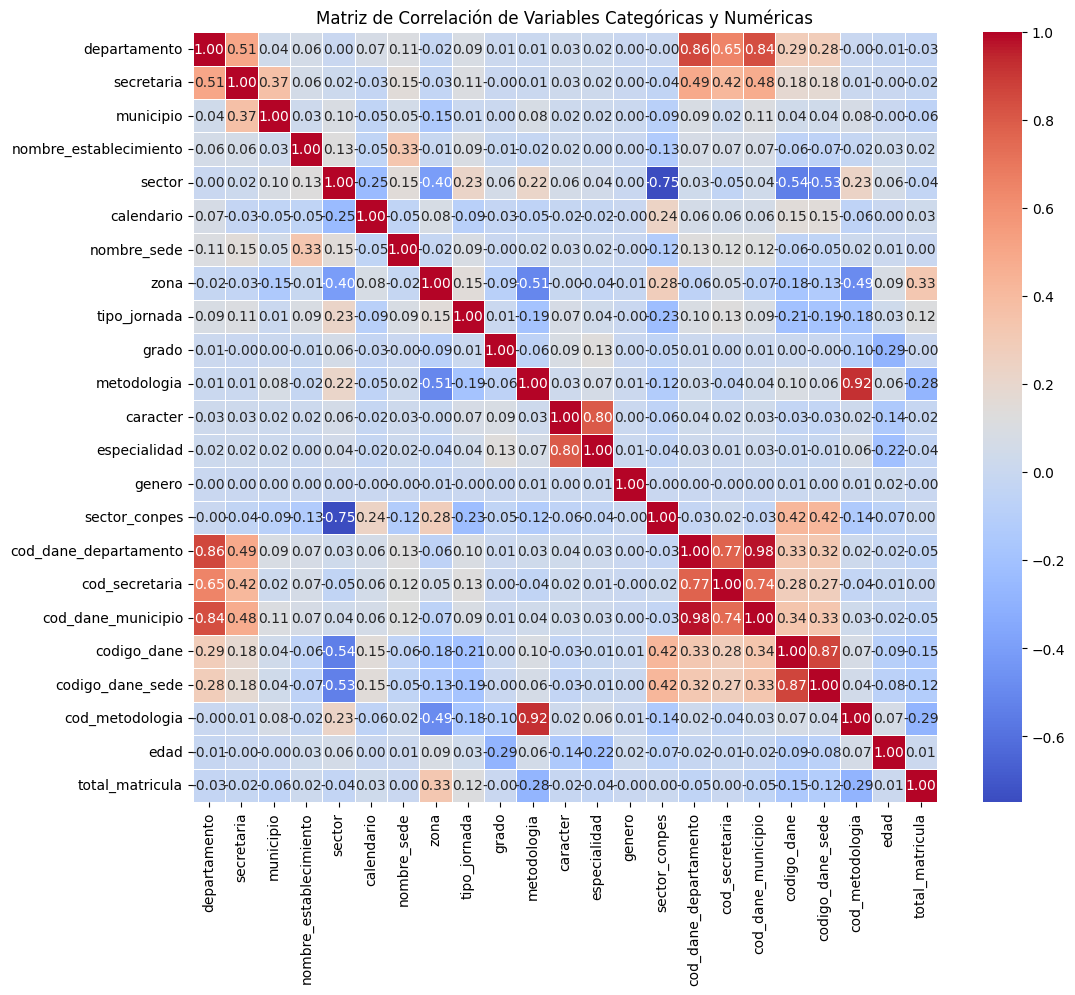

In [ ]:
# Convertir todas las variables categóricas a cadenas de texto
data[object_columns] = data[object_columns].astype(str)

# Convertir variables categóricas a valores numéricos
label_encoder = LabelEncoder()
for var in object_columns:
    data[var] = label_encoder.fit_transform(data[var])

# Calcular la matriz de correlación entre variables categóricas y numéricas
correlation_matrix = data[object_columns + numeric_columns].corr(method='kendall')

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añadir título
plt.title('Matriz de Correlación de Variables Categóricas y Numéricas')

# Mostrar el mapa de calor
plt.show()

Como se puede observar la mayoria de variables son categóricas y no existe correlacion entre ellas (por supuesto no se consideran variables expresadas en dos columnas por ejemplo 'metodologia' y 'cod_metodologia' ya que representan lo mismo). A continuación se procede a ver de manera visual cuales relaciones podrian llegar a predecirse:

<Axes: xlabel='zona', ylabel='metodologia'>

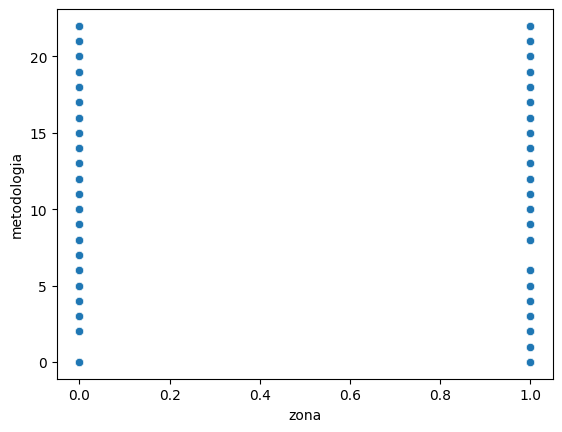

In [ ]:
#zona vs metodologia
sns.scatterplot(x='zona',y='metodologia',data=data)

En este caso se observa poca correlación entre la variable independiente de zona, que puede tomar los valores de urbano y rural. Sin embargo, no hay una relación clara con metodología.

<Axes: xlabel='grado', ylabel='edad'>

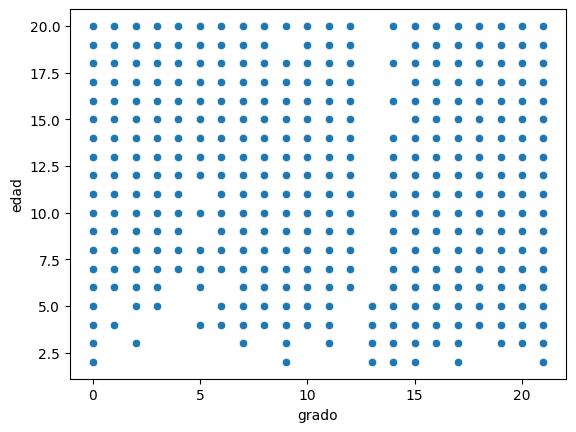

In [ ]:
#zona vs metodologia
sns.scatterplot(x='grado',y='edad',data=data)

De igual forma que en el gráfico anterior entre zona y metodología, no se ve ninguna una relación en el diagramde dispersión entre la variable grado y la variable edad.

<Axes: xlabel='caracter', ylabel='especialidad'>

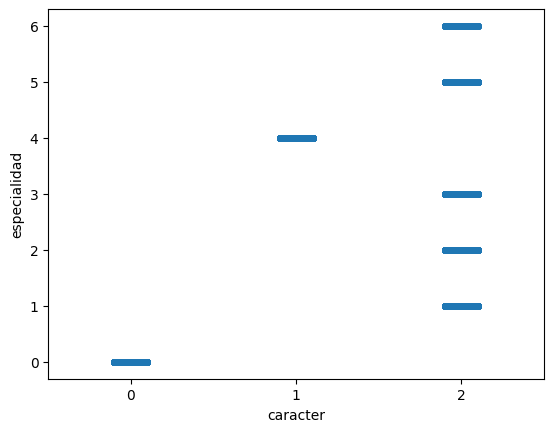

In [ ]:
#zona vs metodologia
sns.stripplot(x='caracter',y='especialidad',data=data)

En búsqueda de una relación más clara entre las variables decidimos revisar un stripplot no encontramos una relación clara que nos permita inferir una posible relación lineal que nos lleve a crear una regresión lineal.


# Conclusión:

Basados en los previos análisis y sobretodo en la información dada en la matriz de correlación, consideramos que el manejo de una regresión lineal con su respectivo testeo e implementación no es posible para estos datos.